### This notebook is on network intrusion detection using NUSW-NB15 
You can visit https://www.unb.ca/cic/datasets/nsl.html for more information about the dataset.
We'd be using the part of the data that is already splitted into training and testing. This set makes it easy to compare our results with others

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### First, We'd explore the X training dataset to gain more insigts then we'd create a preprocessing pipeline

In [2]:
df = pd.read_csv('data/UNSW_NB15_training-set.csv')
pd.set_option('display.max_columns', None) # show all columns on display or print
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### There are no null values. All have 82332 non-null

In [4]:
# Let's how how many duplicate rows we have
df.duplicated().sum()

0

### The 26387 duplicated rows suggest that the data has been over sampled

In [5]:
# Let's look at the object columns
object_series = df.select_dtypes('object')
object_series.head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [6]:
# Let's look at the unique values
for col in object_series.columns:
    print(col, df[col].unique())

proto ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'sccopm

In [7]:
# Let's see how many are in each column
for col in object_series.columns:
    print(col, df[col].nunique())

proto 131
service 13
state 7
attack_cat 10


In [8]:
# Let's encode the object columns
encoded_df = pd.get_dummies(df, columns=['proto', 'service', 'state'], drop_first=True)

# We don't need the id column
# We'd be working on binary calssification. That is attack vs normal.
# Adding the attack_cat column which already knows there's an attack or not will be cheating. So we'll drop it because it'll cause data leakage.
X = encoded_df.drop(['id', 'label', 'attack_cat'], axis=1)
X = X.astype("float64") # Convert all columns to float
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2.0,0.0,496.0,0.0,90909.0902,254.0,0.0,180363632.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000008,2.0,0.0,1762.0,0.0,125000.0003,254.0,0.0,881000000.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,881.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000005,2.0,0.0,1068.0,0.0,200000.0051,254.0,0.0,854400000.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
len(X.columns)

187

In [10]:
y = df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: label, Length: 82332, dtype: int64

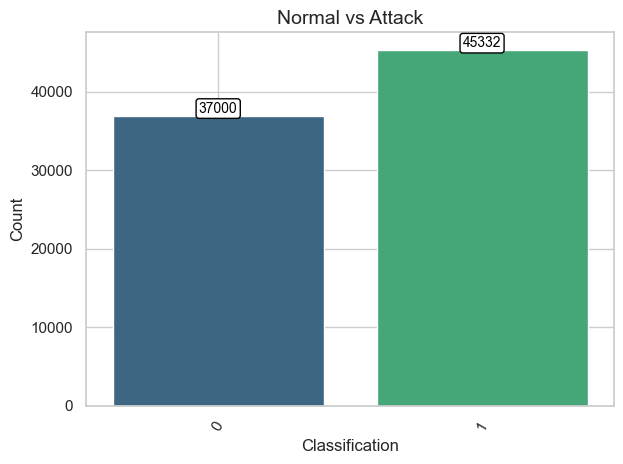

In [11]:
sns.set(style="whitegrid")

ax = sns.countplot(x=y, palette='viridis', hue=y, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

plt.title('Normal vs Attack', fontsize=14)
plt.xlabel('Classification', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=60)

plt.grid(True)
plt.tight_layout()

plt.show()

### The status of imbalance looks great. No problem with imbalance

- We'd use `RandomForestClassifier` with `SelectFromModel` to select the most important features.
- We'd also use `PCA` after the feature selection to reduce the data dimensionality. This would also help when we're using the `SVM` which is computationally expensive.
- We'd wrap everything in a pipline

## Feature Selection

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='0.75*mean') # Threshold set to select more features

feature_selector.fit_transform(X, y)
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
feature_selector.get_support().sum()


39

In [14]:
# We've moved from a hundrea and eighty seven feature model to 39
# Selected features
selected_cols = X.columns[feature_selector.get_support()]
selected_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'proto_tcp', 'proto_udp', 'service_dns',
       'state_CON', 'state_INT', 'state_REQ'],
      dtype='object')

## Scalling the selected features

In [15]:
# We'd then standardize the selected features for PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_cols])

## Principal Component Analysis

<Axes: >

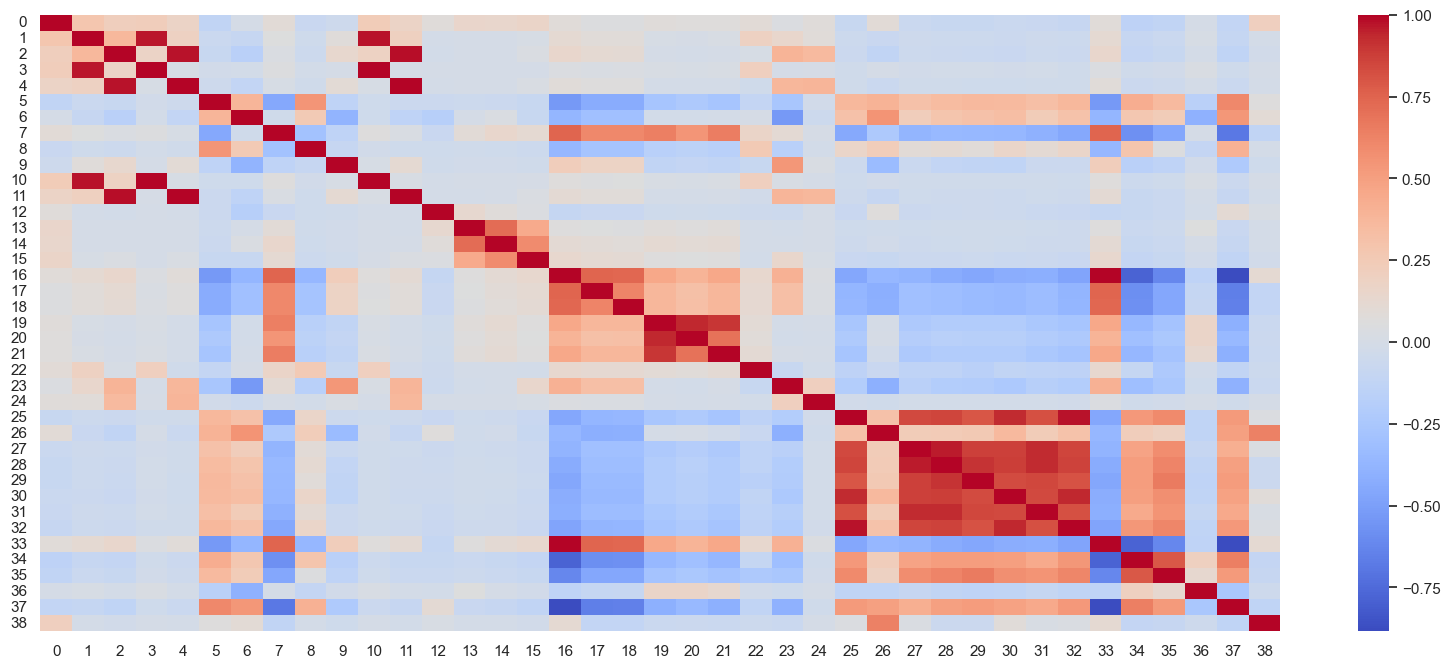

In [16]:
# Let's Check for correlation before pca features.
correlation_matrix = pd.DataFrame(X_scaled).corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')

In [17]:
# PCA is used to reduce the dimensionality of the data and also reduce the correlation between the features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [18]:
X_pca.shape

(82332, 20)

<Axes: >

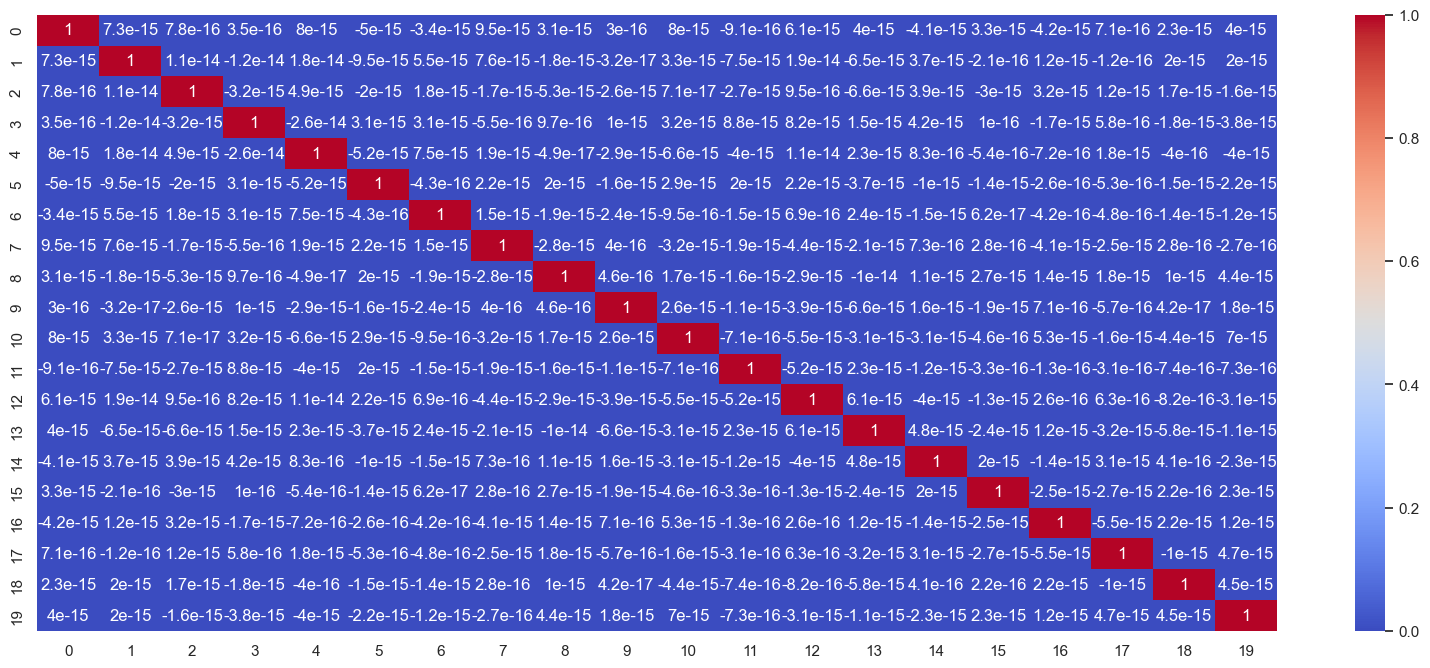

In [19]:
# Let's Check for correlation on the pca features. This is expected to be very low!
correlation_matrix = pd.DataFrame(X_pca).corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### We're down to 20 now. Let's put everything in a preprocessing pipeline

In [4]:
training_df = pd.read_csv('./data/UNSW_NB15_training-set.csv')
testing_df = pd.read_csv('./data/UNSW_NB15_testing-set.csv')

In [5]:
training_df.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0


In [6]:
testing_df.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0


<h3 style="color: yellow">I noted this during fitting the pipeline below on the test set.</h3>
<li>There are some values in some of the original categorical columes of the test set that are not in the train set and vice versa.</li>
<li>We'd have to make all of them have the same unique values in each category allowing us to use the same training data fitted pipline to transform all of them.
</li>

In [7]:
# Below are elements in either of any of the categorical columns but not in both
print(set(training_df["state"].unique()) ^ (set(testing_df["state"].unique())))
print("=========================================")
print(set(training_df["proto"].unique()) ^ (set(testing_df["proto"].unique())))
print("=========================================")
print(set(training_df["service"].unique()) ^ (set(testing_df["service"].unique())))

{'ACC', 'no', 'ECO', 'PAR', 'CLO', 'URN'}
{'icmp', 'rtp'}
set()


In [8]:
# Identify unique categories in both training and test sets for each categorical column that have different number of unuque values
cat_cols_with_diff_unique_vals = ['proto', 'state']

for column in cat_cols_with_diff_unique_vals:
    unique_vals = set(training_df[column].unique()).union(set(testing_df[column].unique()))
    training_df[column] = training_df[column].astype('category').cat.set_categories(unique_vals)
    testing_df[column] = testing_df[column].astype('category').cat.set_categories(unique_vals)

In [9]:
print("proto has same unique vals in train and test:", all(training_df["proto"].cat.categories == testing_df["proto"].cat.categories))
print("state has same unique vals in train and test:", all(training_df["state"].cat.categories == testing_df["state"].cat.categories))

proto has same unique vals in train and test: True
state has same unique vals in train and test: True


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Custom transformer to drop ID column and get dummies
class Preprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.drop(['id', 'attack_cat', 'label'], axis=1)
        X = pd.get_dummies(X, columns=['proto', 'service', 'state'])
        return X

preprocessing_pipeline = Pipeline([
    ('preprocessor', Preprocessor()),
    ('to_float', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42))),
    ('pca', PCA(n_components=0.95, random_state=42)),
])

In [13]:
# Though we already have preprocessed X which we could use, we'd still just run the original data in our preprocessor to get the X_train.
y_train = training_df['label']
X_train = preprocessing_pipeline.fit_transform(training_df, y_train)

In [14]:
y_test = testing_df['label']
X_test = preprocessing_pipeline.transform(testing_df) # We don't fit the test data. We only transform it.

In [15]:
X_train.shape[1] == X_test.shape[1] # X_train should have same number of columns as X_test

True

<h2 style="text-align: center; color: yellow"> RandomForestClassifier </h2>

In [16]:
# Though we planed on using SVM at this moment, we''ll just try Random Forest and see
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_split=8, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=8, n_estimators=200,
                       random_state=42)

In [26]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [18]:
rf_y_test_pred = rf_clf.predict(X_test)
rf_y_train_pred = rf_clf.predict(X_train)

print("Recall|     train:test", recall_score(y_train, rf_y_train_pred), ":", recall_score(y_test, rf_y_test_pred))
print("Precision|  train:test", precision_score(y_train, rf_y_train_pred), ":", precision_score(y_test, rf_y_test_pred))
print("F1|         train:test", f1_score(y_train, rf_y_train_pred), ":", f1_score(y_test, rf_y_test_pred))
print("Accuracy|   train:test", accuracy_score(y_train, rf_y_train_pred), ":", accuracy_score(y_test, rf_y_test_pred))

Recall|     train:test 0.888577605223683 : 0.862804903595579
Precision|  train:test 0.8939414114513982 : 0.9661824869571745
F1|         train:test 0.89125143818037 : 0.9115721538822467
Accuracy|   train:test 0.8806053539328572 : 0.8860677194723424


This model is not overfitting and performs very well

<h2 style="text-align: center; color: yellow"> SVM Model </h2>

In [19]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
svm_y_test_pred = svm_clf.predict(X_test)
svm_y_train_pred = svm_clf.predict(X_train)

In [25]:
print("Recall|     train:test", recall_score(y_train, svm_y_train_pred), ":", recall_score(y_test, svm_y_test_pred))
print("Precision|  train:test", precision_score(y_train, svm_y_train_pred), ":", precision_score(y_test, svm_y_test_pred))
print("F1|         train:test", f1_score(y_train, svm_y_train_pred), ":", f1_score(y_test, svm_y_test_pred))
print("Accuracy|   train:test", accuracy_score(y_train, svm_y_train_pred), ":", accuracy_score(y_test, svm_y_test_pred))

Recall|     train:test 0.8731359745874878 : 0.8357563620214343
Precision|  train:test 0.9470271563584161 : 0.980708343985369
F1|         train:test 0.908581725527104 : 0.9024488447949041
Accuracy|   train:test 0.9032575426322693 : 0.8770224876098573


On average, the SVM performs better. Let's see it's metrics

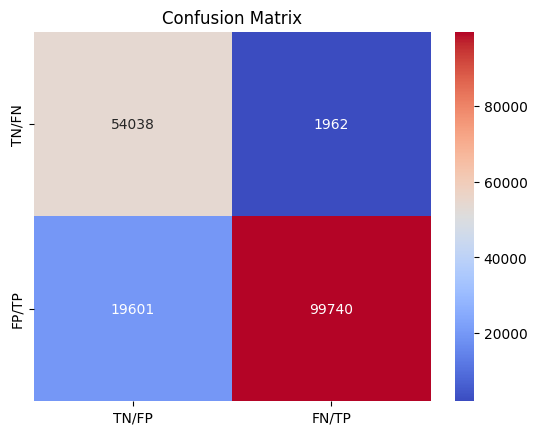

In [33]:
from sklearn.metrics import confusion_matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, svm_y_test_pred), 
                             index=['Actual Negative', 'Actual Positive'], 
                             columns=['Predicted Negative', 'Predicted Positive'])

confusion_mat = confusion_mat.rename(index={'Actual Negative': 'TN/FN', 'Actual Positive': 'FP/TP'},
                                     columns={'Predicted Negative': 'TN/FP', 'Predicted Positive': 'FN/TP'})

sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', fmt='d')

plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83     56000
           1       0.98      0.84      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.90      0.87    175341
weighted avg       0.90      0.88      0.88    175341



In [ ]:
svm_y_test_pred_proba = svm_clf.decision_function(X_test) # This is actually decision values, not probabilities!
# For computaional reasons, we set probability=True and therefore can't use predict_proba

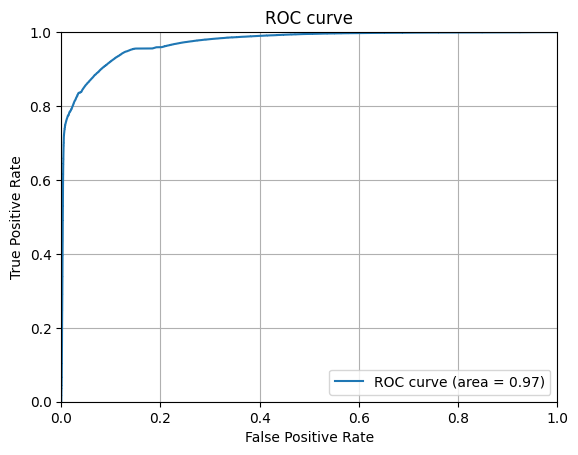

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, svm_y_test_pred_proba)
auc = roc_auc_score(y_test, svm_y_test_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)

### From the scores and the ROC curve, the model performs well!

- With the decision values we have, we could use a different threshold than the default 0 used by svm
and look at the performance of the model with the decision values. 
- It's usually the predict_proba values used for this but we can't have those because probability was set to false in our model.
- I took a quick little look at the different threshold, didn't actually make a better change. You can try it with much attension and check.